<a href="https://colab.research.google.com/github/EmmanuelChinkaka/W23-GEOG271/blob/main/Class_Demo/Displaying_Geographic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Displaying Geographic Data - GEOG271**## 

> **By Emmanuel Chinkaka**

> **University of Delaware**

> **Department of Geography and Spatial Sciences**











In this notebook, we will learn an easy way to plot Geographic data. The python libraries required are :

> pandas

> matplotlib

> geopandas

We know that pandas and matplotlib are commmonly used python libraries for data analysis and plotting graphs. Now lets see what is geopandas?

**GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by 'pandas' to allow spatial operations on geometric types. Geometric operations are performed by 'shapely'. Geopandas further depends on 'fiona' for file access and 'descartes' and 'matplotlib' for plotting. More details can be found here**

How to install geopandas : pip install geopandas




> **A shapefile** is a simple, nontopological format for storing the geometric location and attribute information of geographic features. Geographic features in a shapefile can be represented by points, lines, or polygons (areas)



**1) Installing Geopandas**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 66.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 81.3 MB/s eta 0:00:00


**2) Importing libraries**

In [ ]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt

**3) Reading data file**

Since we are accesing the data from Class google drive folder, https://drive.google.com/drive/u/1/folders/1rqCaWYsAfiZvp37KUZOPdz80A4pM87kb we need to mount the drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**3a) Loading a CSV file**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/W23-GEOG271/India/data_India.csv')
df.head()

,FID,Shape,state,paramedics,density
0,1,Polygon,Arunanchal Pradesh,62,566
1,2,Polygon,Assam,23,4324
2,3,Polygon,Bihar,344,566
3,4,Polygon,Chandigarh,4556,777
4,5,Polygon,Chhattisgarh,6778,733


**3b) Reading shape file**

In [ ]:
shapefile = gpd.read_file('/content/drive/MyDrive/W23-GEOG271/India/India States')
shapefile.head()

,st_nm,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


**4) Renaming Columns**

In [ ]:
shapefile = shapefile.rename(columns={"st_nm": "State"})

shapefile.head()

,State,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


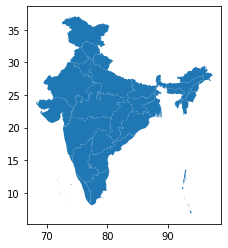

In [ ]:
shapefile.plot();

In [ ]:
shapefile.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

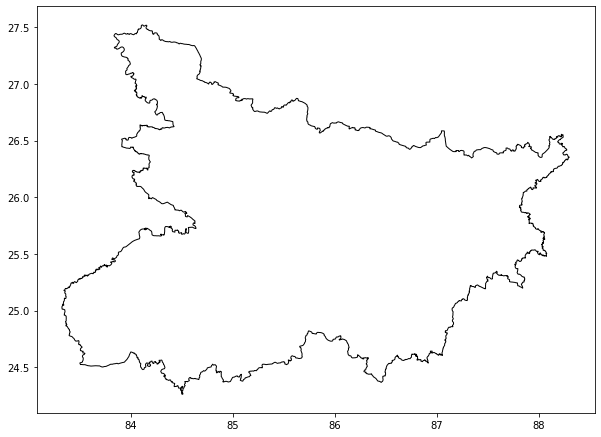

In [ ]:
fig, gax = plt.subplots(figsize=(10, 10))
shapefile.query("State == 'Bihar'").plot(ax=gax, edgecolor="black", color="white")

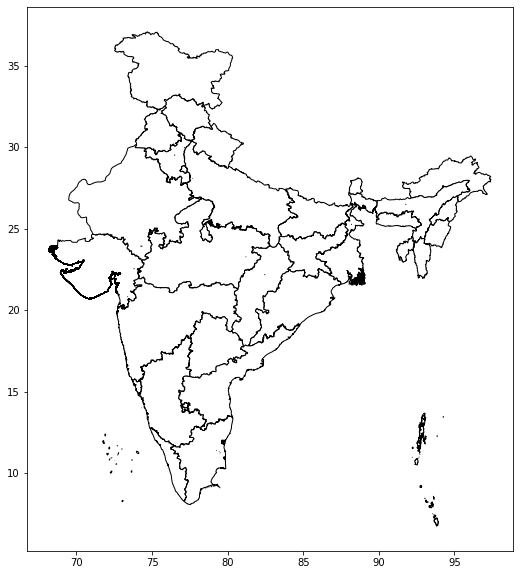

In [ ]:
fig, gax = plt.subplots(figsize=(10, 10))
shapefile.plot(ax=gax, edgecolor="black", color="white")

**5) Merging data file and shape file based on names of Indian states**

In [ ]:
merged = shapefile.set_index('State').join(df.set_index('state'))
merged.head()

,geometry,FID,Shape,paramedics,density
State,,,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN,NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,Polygon,62.0,566.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",2.0,Polygon,23.0,4324.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",3.0,Polygon,344.0,566.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",4.0,Polygon,4556.0,777.0


**5) Removing Columns**

In [ ]:
merged = merged.drop(columns=['FID', 'Shape'])
merged.head()

,geometry,paramedics,density
State,,,
Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",NaN,NaN
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",62.0,566.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",23.0,4324.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",344.0,566.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",4556.0,777.0


**6) Removing NaN**

In [ ]:
data = merged.dropna()
data.head()

,geometry,paramedics,density
State,,,
Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",62.0,566.0
Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",23.0,4324.0
Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",344.0,566.0
Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",4556.0,777.0
Chhattisgarh,"POLYGON ((83.33532 24.09885, 83.35346 24.09627...",6778.0,733.0


**7) Plotting map of India**

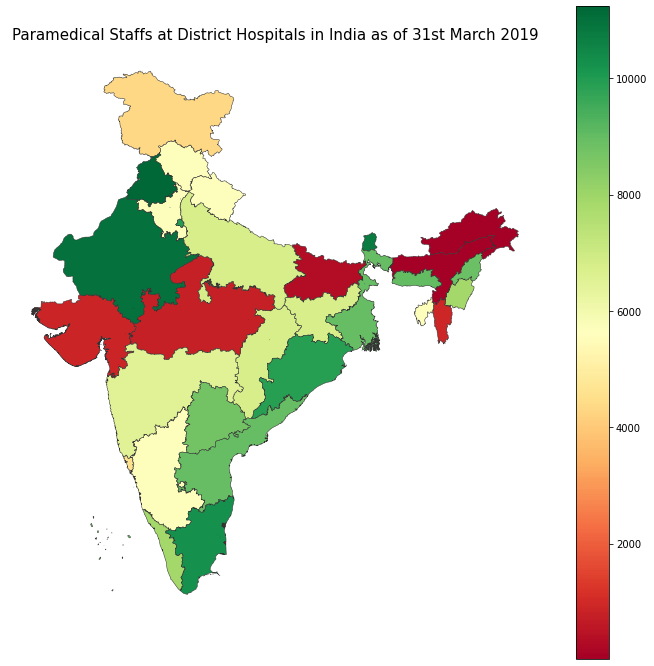

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Paramedical Staffs at District Hospitals in India as of 31st March 2019',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = data.plot(column='paramedics', cmap='RdYlGn', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

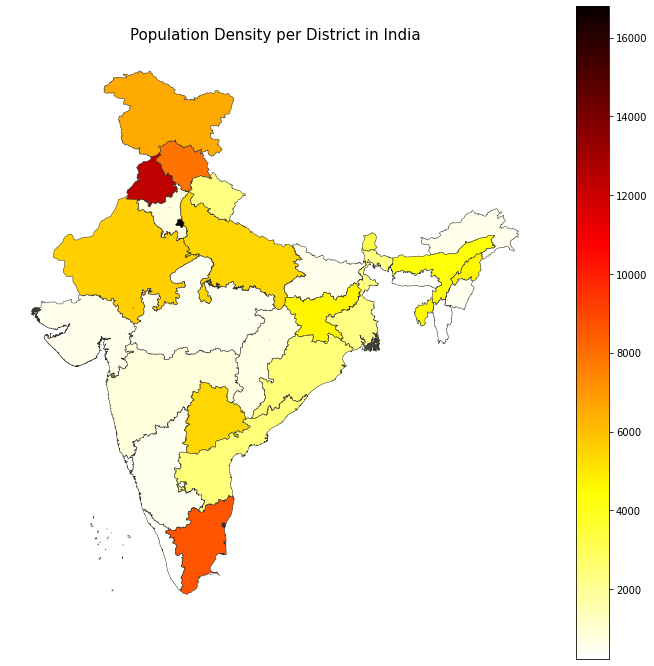

In [ ]:
fig, ax = plt.subplots(1, figsize=(12, 12))
ax.axis('off')
ax.set_title('Population Density per District in India',
             fontdict={'fontsize': '15', 'fontweight' : '3'})
fig = data.plot(column='density', cmap='hot_r', linewidth=0.5, ax=ax, edgecolor='0.2',legend=True)

**END**